In [ ]:
import pandas as pd

In [2]:
import nltk
import numpy as np
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
from pandarallel import pandarallel
import multiprocessing
import spacy
from wordcloud import WordCloud

In [4]:
from google.cloud import storage
storage_client = storage.Client()

bucket_name = "nlp_finalproject"

bucket = storage_client.bucket(bucket_name)
print(f"Bucket {bucket.name} connected.")

ModuleNotFoundError: No module named 'google.cloud'

In [ ]:
df_plot = pd.read_parquet("gs://nlp_finalproject/FinalData.parquet", engine='pyarrow')
df_plot.head(5)

,date,title,text,year,cleaned,clean_title,ORG_Ent,sentiment,sentiment_score,Person_Ent,yelp_sent_score,sentiment_yelp,GPE_Ent,PROD_Ent
0,2020-02-26,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,2020,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,[LegalTech Artificial Intelligence Market Tec...,Positive,0.9991,"[Aristocrat Leisure, Thermo Fisher, Woodley Eq...","[0.9991054475349816, 0.000894552465018403]",Negative,"[Midmark, Medicatech, Everlaw, Lawgeex, LEVERT...",[Articles]
4,2020-08-07,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,2020,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,"[AI Express, PostBeyond BygoneEpic PowerIn Ret...",Negative,-0.9728,"[Kozhikode airportTop Toggle, Safari, safari,...","[0.9997745515347954, 0.00022544846520459693]",Negative,"[Dubai, Kozhikode]",[]
7,2021-02-25,MulticoreWare Inc. Becomes CEVA’s Trusted Part...,\n\nMulticoreWare Inc. Becomes CEVA’s Trusted ...,2021,MulticoreWare Inc. Becomes CEVA s Trusted Part...,MulticoreWare Inc. Becomes CEVA s Trusted Part...,"[MulticoreWare Inc., Trusted Partner for Imagi...",Positive,0.9981,"[Erez Natan, Soumendra Mohanty]","[0.9946702958949173, 0.005329704105082685]",Negative,"[SAN JOSE, Calif., CEVA, Deep Learning, CEVA, ...","[CEVA, CEVA, CEVA, CEVA, CEVA, CEVA, CEVA, CEV..."
8,2022-10-06,Healthcare Artificial Intelligence Market Anal...,\n\nHealthcare Artificial Intelligence Market ...,2022,Healthcare Artificial Intelligence Market Anal...,Healthcare Artificial Intelligence Market Anal...,[Healthcare Artificial Intelligence Market Ana...,Positive,0.9993,"[AiCure, Web , Profile Follow]","[0.08046707158729571, 0.9195329284127043]",Positive,"[New Jersey, USA, SBWire, Suraj, United States...",[Tables]
9,2020-04-29,Artificial Intelligence As A Service Market : ...,\n\nArtificial Intelligence As A Service Marke...,2020,Artificial Intelligence As A Service Market : ...,Artificial Intelligence As A Service Market : ...,"[Artificial Intelligence As A Service Market, ...",Positive,0.9996,"[Emerging Trends, IRIS AI, Get Sample PDF, Pur...","[0.959171258240741, 0.04082874175925896]",Negative,"[Bigml, H2o, Vietnam, China, Malaysia, Japan, ...","[Industry Trends, Industry Trends]"


In [ ]:
df_plot = df_plot.drop(['sentiment','sentiment_score'],axis=1)

In [ ]:
df_plot.head(5)

,date,title,text,year,cleaned,clean_title,ORG_Ent,Person_Ent,yelp_sent_score,sentiment_yelp,GPE_Ent,PROD_Ent
0,2020-02-26,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,2020,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,[LegalTech Artificial Intelligence Market Tec...,"[Aristocrat Leisure, Thermo Fisher, Woodley Eq...","[0.9991054475349816, 0.000894552465018403]",Negative,"[Midmark, Medicatech, Everlaw, Lawgeex, LEVERT...",[Articles]
4,2020-08-07,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,2020,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,"[AI Express, PostBeyond BygoneEpic PowerIn Ret...","[Kozhikode airportTop Toggle, Safari, safari,...","[0.9997745515347954, 0.00022544846520459693]",Negative,"[Dubai, Kozhikode]",[]
7,2021-02-25,MulticoreWare Inc. Becomes CEVA’s Trusted Part...,\n\nMulticoreWare Inc. Becomes CEVA’s Trusted ...,2021,MulticoreWare Inc. Becomes CEVA s Trusted Part...,MulticoreWare Inc. Becomes CEVA s Trusted Part...,"[MulticoreWare Inc., Trusted Partner for Imagi...","[Erez Natan, Soumendra Mohanty]","[0.9946702958949173, 0.005329704105082685]",Negative,"[SAN JOSE, Calif., CEVA, Deep Learning, CEVA, ...","[CEVA, CEVA, CEVA, CEVA, CEVA, CEVA, CEVA, CEV..."
8,2022-10-06,Healthcare Artificial Intelligence Market Anal...,\n\nHealthcare Artificial Intelligence Market ...,2022,Healthcare Artificial Intelligence Market Anal...,Healthcare Artificial Intelligence Market Anal...,[Healthcare Artificial Intelligence Market Ana...,"[AiCure, Web , Profile Follow]","[0.08046707158729571, 0.9195329284127043]",Positive,"[New Jersey, USA, SBWire, Suraj, United States...",[Tables]
9,2020-04-29,Artificial Intelligence As A Service Market : ...,\n\nArtificial Intelligence As A Service Marke...,2020,Artificial Intelligence As A Service Market : ...,Artificial Intelligence As A Service Market : ...,"[Artificial Intelligence As A Service Market, ...","[Emerging Trends, IRIS AI, Get Sample PDF, Pur...","[0.959171258240741, 0.04082874175925896]",Negative,"[Bigml, H2o, Vietnam, China, Malaysia, Japan, ...","[Industry Trends, Industry Trends]"
10,2021-01-10,Conversational AI Marketplace Enlargement Poss...,\n\nConversational AI Marketplace Enlargement ...,2021,Conversational AI Marketplace Enlargement Poss...,Conversational AI Marketplace Enlargement Poss...,"[AI Marketplace Enlargement Possibilities, For...","[Avid, Avid, Avid, Buyer Give, Primary, Best A...","[0.9999954805578336, 4.519442166347339e-06]",Negative,"[North The united states, The united states, A...",[Minuteman 3]
14,2023-12-12,"The European Union releases the AI Act, the wo...","\n\n\nThe European Union releases the AI Act, ...",2023,"The European Union releases the AI Act, the wo...","The European Union releases the AI Act, the wo...","[The European Union, ABC Chicago, Suburban Coo...","[North SuburbsWest, North SuburbsWest, Newscas...","[0.9999999987101114, 1.2898886069186982e-09]",Negative,"[Videos, SAN JOSE, Calif., Principal AI, San M...",[]
15,2020-08-28,Funding boost for artificial intelligence in N...,\nFunding boost for artificial intelligence in...,2020,Funding boost for artificial intelligence in N...,Funding boost for artificial intelligence in N...,"[NHS, Breaking News, EASTERN CARIBBEAN CURRENC...","[Agenparl \r sabato, Agosto 29, Redazio...","[0.9978447379626016, 0.0021552620373983403]",Negative,"[UK, LONDON, UNITED KINGDOM, London, England, ...",[]
16,2020-05-31,Walmart employees are out to show its anti-sho...,\n\nWalmart employees are out to show its anti...,2020,Walmart employees are out to show its anti-sho...,Walmart employees are out to show its anti-sho...,"[AI, AI, UTC, Walmart, Concerned Home Office A...","[Louise Matsakis, Enlarge Roberto Machado Noa,...","[1.0, 7.775749518667134e-32]",Negative,"[Bentonville, Arkansas, Cork, Ireland,

In [8]:
num_processors = multiprocessing.cpu_count()
pandarallel.initialize(nb_workers=num_processors-1, use_memory_fs=False, progress_bar = True)

INFO: Pandarallel will run on 15 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [9]:
df_plot['quarter'] = df_plot['date'].dt.year.astype(str) + ' Q' + df_plot['date'].dt.quarter.astype(str)

In [12]:
industry_jobs = {
    "Healthcare": [
        "Doctor",
        "Physician",
        "Nurse",
        "Pharmacist",
        "Physical Therapist",
        "Medical Laboratory Technician",
        "Healthcare Administrator",
        "Radiologist",
        "Occupational Therapist",
        "Dietitian",
        "Nutritionist",
        "Clinical Research Coordinator",
        "Healthcare Administrator",
        "Medical Assistant"
    ],
    
    "Finance": [
        "Financial Analyst",
        "Accountant",
        "Investment Banker",
        "Financial Planner",
        "Risk Manager",
        "Credit Analyst",
        "Portfolio Manager",
        "Auditor",
        "Actuary",
        "Tax Advisor",
        "Compliance Officer",
        "Wealth Manager",
        "Quantitative Analyst",
        "Trader",
        "Financial Controller",
        "Actuary",
        "Loan Officer",
        "Asset Manager",
        "Treasury Analyst",
        "Insurance Underwriter",
        "Finance Manager"
    ],
    
    "Cybersecurity": [
        "Security Analyst",
        "Penetration Tester",
        "Cybersecurity Consultant",
        "Information Security Manager",
        "Network Security Engineer",
        "Cryptographer",
        "Incident Responder",
        "Security Architect",
        "Forensic Computer Analyst",
        "Compliance Officer"
    ],
    
    "Technology": [
        "Software Engineer",
        "Software Developer",
        "UX/UI Designer",
        "Network Engineer",
        "Systems Analyst",
        "Web Developer",
        "Systems Administrator",
        "IT Support Specialist",
        "Technical Project Manager",
        "Database Administrator",
        "IT Project Manager",
        "Cloud Architect",
        "Solution Architect",
        "Network Administrator",
        "Data Scientist",
        "Cloud Engineer",
        "DevOps Engineer",
        "Data Analyst"
    ],
    "Cryptocurrency": [
        "Blockchain Developer",
        "Cryptocurrency Analyst",
        "Smart Contract Developer",
        "Cryptocurrency Miner",
        "Cryptocurrency Exchange Manager",
        "Compliance Specialist (Crypto)",
        "ICO Advisor",
        "Cryptocurrency Trader",
        "Wallet Developer",
        "Blockchain Consultant"
    ],
    "Microchips": [
        "CPU Design Engineer",
        "Hardware Engineer",
        "GPU Performance Analyst",
        "Deep Learning Engineer",
        "Firmware Developer",
        "Verification Engineer",
        "System Software Engineer",
        "Embedded Systems Engineer",
        "Hardware Design Engineer",
        "Product Marketing Manager (Graphics)"
        "Data Center Solutions Architect",
        "Technical Support Engineer",
        "SOC Architect",
        "Research Scientist (Semiconductor)"
        "Semiconductor Process Engineer",
        "Microchip Designer",
        "Quality Assurance Engineer (Microchips)",
        "Semiconductor Sales Manager",
        "Material Scientist",
        "Process Integration Engineer",
        "Equipment Engineer",
        "Yield Enhancement Engineer",
        "Test Engineer (Microchips)",
        "Product Manager (Microchips)"
    ],
    "Automobile": [
        "Automotive Engineer",
        "Mechanical Engineer (Automotive)",
        "Design Engineer (Automotive)",
        "Quality Assurance Engineer (Automotive)",
        "Production Manager (Automotive)",
        "Technician",
        "Automotive Sales Manager",
        "Supply Chain Manager (Automotive)",
        "Process Engineer (Automotive)",
        "Research and Development Engineer (Automotive)"
    ],
    "Education": [
        "Teacher",
        "Principal",
        "Academic Advisor",
        "Curriculum Developer",
        "Education Administrator",
        "Special Education Teacher",
        "Guidance Counselor",
        "Librarian",
        "Instructional Coordinator",
        "Tutor",
        "Lecturer"
    ]
}

def find_job_titles_and_industries(text):
    found_jobs = []
    found_industries = []
    for industry, jobs in industry_jobs.items():
        for job in jobs:
            if job.lower() in text.lower():  
                found_jobs.append(job)
                found_industries.append(industry)
                
    return ', '.join(found_jobs), ', '.join(found_industries)

df_plot[['Job_Titles', 'Industry']] = df_plot['cleaned'].parallel_apply(lambda x: pd.Series(find_job_titles_and_industries(x)))

In [13]:
df_plot[['Job_Titles', 'Industry']]

,Job_Titles,Industry
0,,
4,,
7,,
8,,
9,,
...,...,...
200429,Software Engineer,Technology
200430,,
200431,Trader,Finance
200433,Doctor,Healthcare


In [14]:
df_positive = df_plot[df_plot['sentiment_yelp']=='Positive']

In [15]:
df_negative = df_plot[df_plot['sentiment_yelp']=='Negative']
df_neutral = df_plot[df_plot['sentiment_yelp']=='Neutral']

### Organisation Frequency

In [16]:
tmp = df_positive[['ORG_Ent']]
plot_tmp = tmp.explode('ORG_Ent')
ORG_counts = plot_tmp['ORG_Ent'].value_counts()

In [17]:
ORG_counts[:25]

ORG_Ent
AI                            250034
Gray Media Group               32593
Microsoft                      17851
PRNewswire                     16401
Google                         15075
IBM                            10084
GPT                             8323
ML                              8004
Apple                           6361
Forecast                        6331
Amazon                          5727
Artificial Intelligence         5727
Intel                           5138
Company                         4802
CrushOn                         4532
EIN                             4166
Gray Media Group, Inc.          4024
COVID                           3880
Environ                         3738
Samsung                         3709
Android                         3565
Artificial Intelligence AI      3402
PredictionsHow                  3391
NVIDIA                          3068
Healthcare                      3047
Name: count, dtype: int64

In [18]:
tmp = df_negative[['ORG_Ent']]
plot_tmp = tmp.explode('ORG_Ent')
ORG_neg_counts = plot_tmp['ORG_Ent'].value_counts()

In [19]:
ORG_neg_counts[:25]

ORG_Ent
AI                         703504
Microsoft                   83381
Google                      73535
Gray Media Group            45242
GPT                         25147
Amazon                      23437
AP                          22585
PRNewswire                  21958
COVID                       15595
EU                          15157
Bard                        14822
Android                     14705
Apple                       14209
Altman                      14056
IBM                         13327
ML                          11902
Meta                        11736
The Associated Press        11063
Associated Press             9531
Congress                     9078
BestReviews                  8385
Nvidia                       8055
Artificial Intelligence      7536
Tesla                        7255
Intel                        7083
Name: count, dtype: int64

In [20]:
tmp = df_neutral[['ORG_Ent']]
plot_tmp = tmp.explode('ORG_Ent')
ORG_neut_counts = plot_tmp['ORG_Ent'].value_counts()

In [21]:
ORG_neut_counts[:25]

ORG_Ent
AI                            162139
Gray Media Group               24581
Microsoft                      13047
PRNewswire                     12309
Google                          9832
IBM                             4874
GPT                             4589
Intel                           4152
ML                              4002
Amazon                          3120
Gray Media Group, Inc.          3000
Apple                           2884
Artificial Intelligence         2835
COVID                           2627
NVIDIA                          2556
Forecast                        2490
PredictionsHow                  2394
Environ                         2320
FCC                             2110
Artificial Intelligence AI      2082
Company                         2025
SAS                             1896
GPU                             1883
Bard                            1876
Nvidia                          1832
Name: count, dtype: int64

### Person Frequency

In [22]:
tmp = df_positive[['Person_Ent']]
plot_tmp = tmp.explode('Person_Ent')
Person_counts = plot_tmp['Person_Ent'].value_counts()

In [23]:
Person_counts[:25]

Person_Ent
Twitter                                     6866
Size                                        3422
GPT-4                                       2926
Sam Altman                                  2210
Austria Azerbaijan                          1995
Verde Cayman                                1931
Zambia Zimbabwe                             1893
Algeria Andorra                             1883
Malawi Malaysia                             1882
Mongolia Montana                            1881
Mexico Michigan                             1881
Alert Maker                                 1881
Montenegro Morocco Mozambique               1881
Argentina Arizona                           1881
Comoros Congo-                              1881
Jordan Kansas                               1881
Kazakhstan Kentucky                         1881
AdvertisingAt Gray                          1869
Telecomm                                    1816
Inquiries Request                           1690
Apps     

In [24]:
tmp = df_negative[['Person_Ent']]
plot_tmp = tmp.explode('Person_Ent')
Person_neg_counts = plot_tmp['Person_Ent'].value_counts()

In [25]:
Person_neg_counts[:25]

Person_Ent
Twitter               20176
Sam Altman            14609
Biden                 13532
GPT-4                 11064
Elon Musk              9004
Musk                   8627
WhatsApp               7976
Joe Biden              4737
AI                     4188
OpenAI                 4078
LinkedIn Email         3713
Generative AI          3638
Anthropic              3429
Google Cloud           3276
Satya Nadella          3213
Dashboard              3048
AdvertisingAt Gray     2980
Donald Trump           2970
Forgot                 2952
COVID-19               2886
Bloomberg              2813
Don                    2793
Facebook Twitter       2780
Sundar Pichai          2749
Inquiries Request      2711
Name: count, dtype: int64

In [26]:
tmp = df_neutral[['Person_Ent']]
plot_tmp = tmp.explode('Person_Ent')
Person_neu_counts = plot_tmp['Person_Ent'].value_counts()

In [27]:
Person_neu_counts[:25]

Person_Ent
Twitter                  3632
Sam Altman               2040
GPT-4                    1768
Size                     1536
AdvertisingAt Gray       1305
Inquiries Request        1153
Telecomm                 1104
Biden                    1016
Elon Musk                 932
AI                        907
Generative AI             893
Math                      767
Center ProfNet            746
WhatsApp                  743
LinkedIn Email            720
Weather Alerts Alerts     706
Musk                      667
Machine Learning          621
Deutschland Espa          614
Amusement Parks           610
Beatles                   598
Gabriel Botha             589
Google Cloud              577
Alert Weather             563
Snap It                   548
Name: count, dtype: int64

### Word Clouds - ORG

#### Positive

In [42]:
organization_counter = Counter()

for entities_list in df_positive['ORG_Ent']:
    for entity in entities_list:
        organization_counter[entity] += 1

organization_dict_positive = dict(organization_counter)

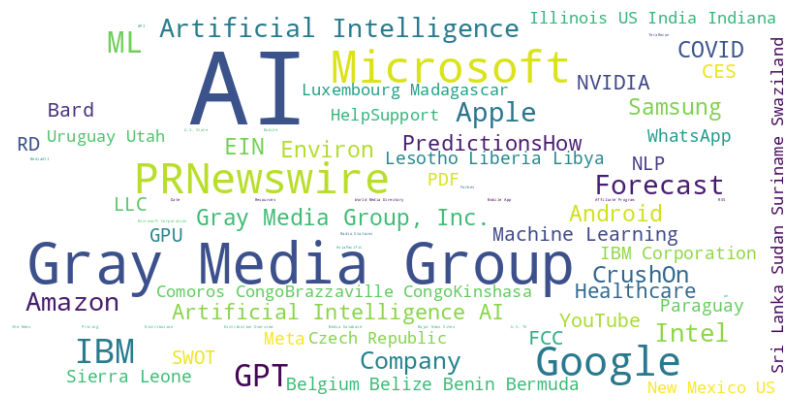

In [43]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(organization_dict_positive)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Negative

In [44]:
organization_counter = Counter()

for entities_list in df_negative['ORG_Ent']:
    for entity in entities_list:
        organization_counter[entity] += 1

organization_dict_negative = dict(organization_counter)

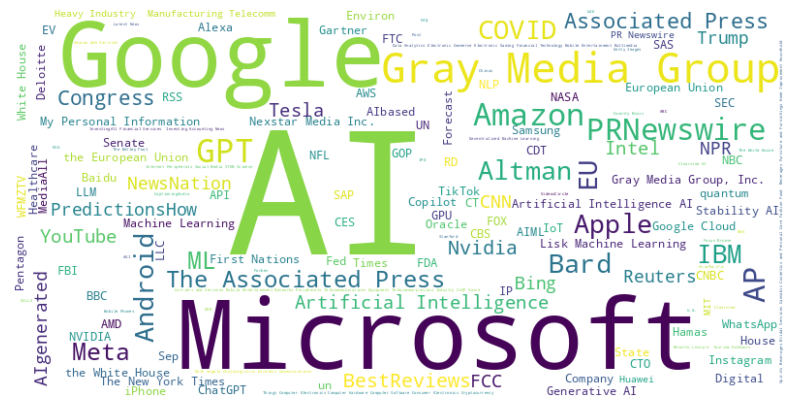

In [45]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(organization_dict_negative)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Clouds - Product

#### Positive

In [51]:
product_counter = Counter()

for entities_list in df_positive['PROD_Ent']:
    for entity in entities_list:
        product_counter[entity] += 1

Product_dict_positive = dict(product_counter)

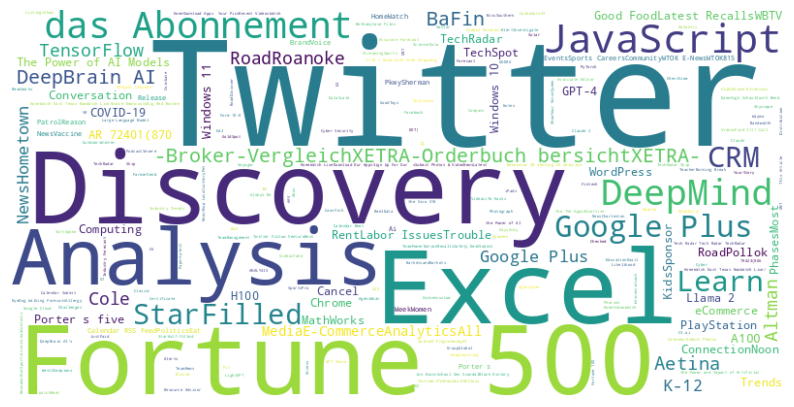

In [52]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Product_dict_positive)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Negative

In [53]:
product_counter = Counter()

for entities_list in df_negative['PROD_Ent']:
    for entity in entities_list:
        product_counter[entity] += 1

Product_dict_negative = dict(product_counter)

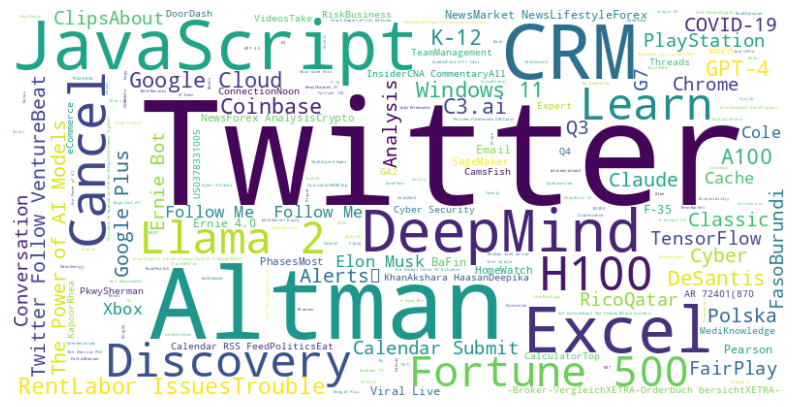

In [54]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Product_dict_negative)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Cloud - People

#### Positive

In [55]:
person_counter = Counter()

for entities_list in df_positive['Person_Ent']:
    for entity in entities_list:
        person_counter[entity] += 1

person_dict_positive = dict(person_counter)

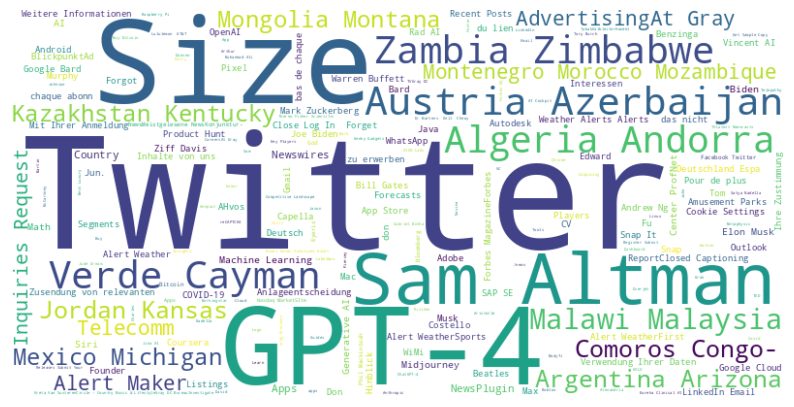

In [56]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(person_dict_positive)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Negative

In [57]:
person_counter = Counter()

for entities_list in df_negative['Person_Ent']:
    for entity in entities_list:
        person_counter[entity] += 1

person_dict_negative = dict(person_counter)

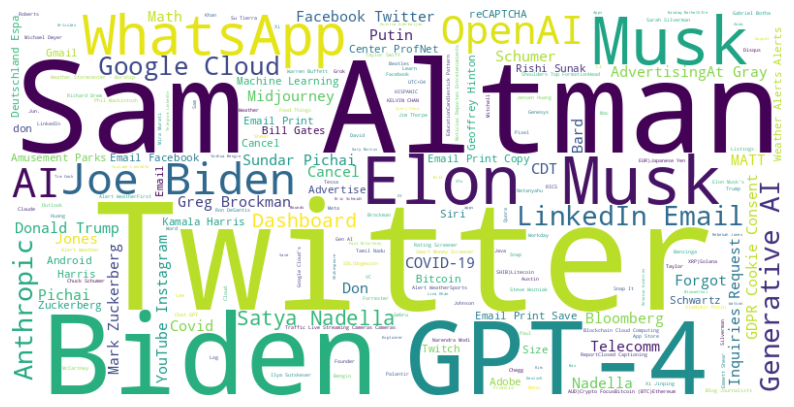

In [58]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(person_dict_negative)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [61]:
df_positive['Job_Titles']

8                          
19                         
28                         
30                         
31                         
                ...        
200419                     
200421                     
200427               Doctor
200429    Software Engineer
200430                     
Name: Job_Titles, Length: 40630, dtype: object

### Word Cloud - Jobs

#### Positive

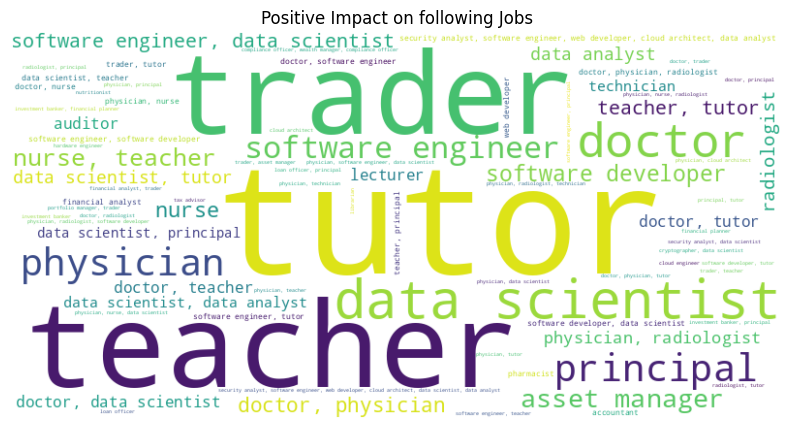

In [65]:
non_empty_job_titles = df_positive['Job_Titles'].dropna().str.lower()

# Count the occurrences of each job title
job_title_counts = Counter(non_empty_job_titles)

# Filter out less frequent job titles
threshold = 15  # adjust this threshold as needed
frequent_job_titles = {job_title: count for job_title, count in job_title_counts.items() if count >= threshold}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(frequent_job_titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Positive Impact on following Jobs')
plt.axis('off')
plt.show()

#### Negative

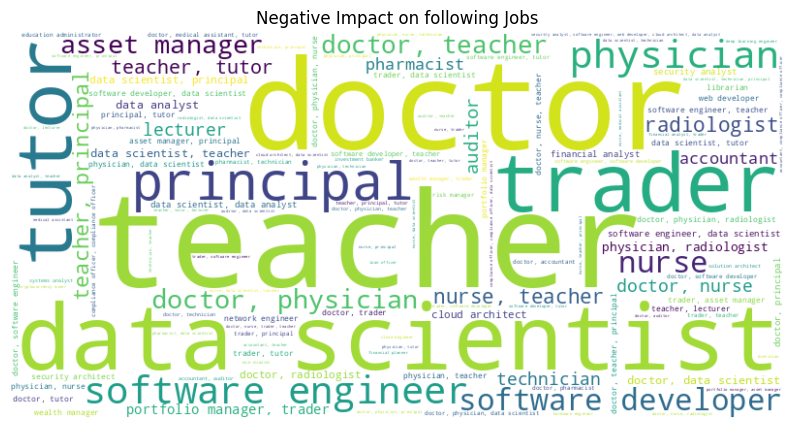

In [67]:
non_empty_job_titles = df_negative['Job_Titles'].dropna().str.lower()

# Count the occurrences of each job title
job_title_counts = Counter(non_empty_job_titles)

# Filter out less frequent job titles
threshold = 15  # adjust this threshold as needed
frequent_job_titles = {job_title: count for job_title, count in job_title_counts.items() if count >= threshold}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(frequent_job_titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative Impact on following Jobs')
plt.axis('off')
plt.show()

### Word Cloud - Industry

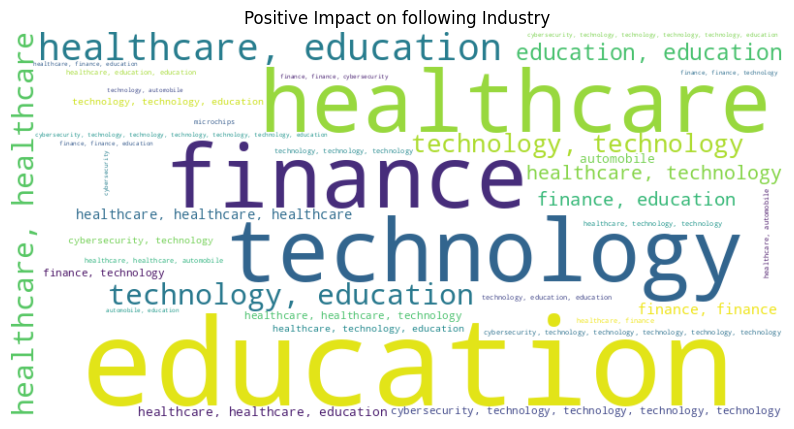

In [68]:
non_empty_industry = df_positive['Industry'].dropna().str.lower()

# Count the occurrences of each job title
industry_counts = Counter(non_empty_industry)

# Filter out less frequent job titles
threshold = 15  # adjust this threshold as needed
frequent_job_titles = {job_title: count for job_title, count in industry_counts.items() if count >= threshold}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(frequent_job_titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Positive Impact on following Industry')
plt.axis('off')
plt.show()

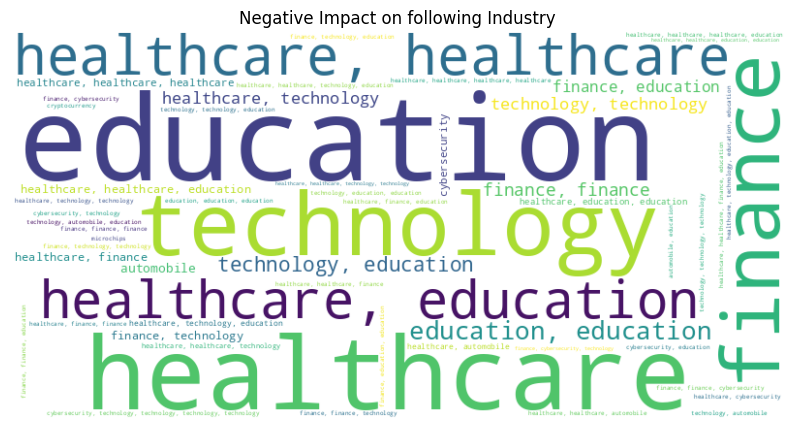

In [69]:
non_empty_industry = df_negative['Industry'].dropna().str.lower()

# Count the occurrences of each job title
industry_counts = Counter(non_empty_industry)

# Filter out less frequent job titles
threshold = 15  # adjust this threshold as needed
frequent_job_titles = {job_title: count for job_title, count in industry_counts.items() if count >= threshold}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(frequent_job_titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative Impact on following Industry')
plt.axis('off')
plt.show()

In [46]:
# text_ORG = ''.join(map(str, df_positive['ORG_Ent']))

In [47]:
# words_to_remove = [
#     'Gray Media Group',
#     'PRNewswire',
#     'Inc',
#     'PredictionsHow',
#     'CES',
#     'RD',
#     'Sierra',
#     'Leone',
#     'Belgium Belize Benin Bermuda',
#     'Paraguay',
#     'Lesotho Liberia Libya',
#     'Sri Lanka',
#     'Sudan',
#     'Suriname Swaziland',
#     'New Mexico US',
#     'Luxembourg',
#     'Madagascar',
#     'HelpSupport',
#     'Illinois US India Indiana',
#     'Czech Republic',
#     'Comoros CongoBrazzaville CongoKinshasa',
#     'Gray Media Group',
#     'Gray Media'
#     'PRNewswire ',
#     'The Associated Press',
#     'Associated Press',
#     'BestReviews',
#     'PredictionsHow',
#     'FCC',
#     'My Personal Information',
#     'Gray Media Group, Inc.',
#     'Baidu',
#     'Liberia',
#     'Lesotho',
#     'Lanka',
#     'Sudan',
#     'LifestyleGray',
#     'Belgium Belize',
#     'News Release',
#     'PRNewswire Gray',
#     'BrandVoice Paid',
#     'Music Lifestyle Gray',
#     'Music LifestyleGray',
#     'Paid Program',
#     'New Mexico',
#     'Gray',
#     'Media',
#     'Group',
#     'Media Group'
#     'Inc',
#     'Public',
#     'Inspection',
#     'Group Gray'
# ]

# text_ORG = ' '.join([str(item) for item in df_positive['ORG_Ent'] if str(item) not in words_to_remove])

In [48]:
# text_ORG = text_ORG.replace("'", "")
# text_ORG = text_ORG.replace(".", "")

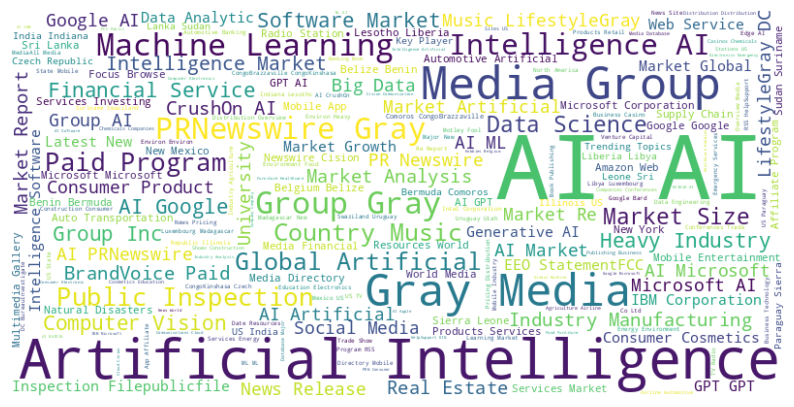

In [50]:
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_ORG)

# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [37]:
# words_to_remove = [
#     'Twitter',
#     'Size',
#     'Austria',
#     'Azerbaijan',
#     'Verde',
#     'Cayman',
#     'Zambia',
#     'Zimbabwe',
#     'Algeria',
#     'Andorra',
#     'Malawi',
#     'Malaysia',
#     'Mongolia',
#     'Montana',
#     'Mexico',
#     'Michigan',
#     'Alert',
#     'Maker',
#     'Montenegro',
#     'Morocco',
#     'Mozambique',
#     'Argentina',
#     'Arizona',
#     'Comoros',
#     'Congo-',
#     'Jordan',
#     'Kansas',
#     'Kazakhstan',
#     'Kentucky',
#     'AdvertisingAt',
#     'Telecomm',
#     'Inquiries',
#     'Request',
#     'Apps',
#     'Country',
#     'NewsPlugin',
#     'Newswires',
#     'Math',
#     'Siri',
#     'Center',
#     'ProfNet',
#     'Amusement',
#     'Parks',
#     'Deutschland',
#     'Espa',
#     'Tom',
#     'Weather',
#     'Alerts',
#     'Android',
#     'Outlook',
#     'Don',
#     'Founder',
#     'Product',
#     'Hunt',
#     'Snap',
#     'It',
#     'Close',
#     'Log',
#     'In',
#     'Forget',
#     'Players',
#     'Math',
#     'Center ProfNet',
#     'LinkedIn Email',
#     'Anthropic',
#     'Alerts',
#     'Alert',
#     'Azerbaijan',
#     'Weather'
    
# ]